# Lecture 4.2: Point Estimation

## Outline

* Difference between estimand, estimator and estimate

* Methods of finding estimators
    * Method of moments (MOM)
    * Maximum likelihood estimation (MLE)
* Evaluating estimators
    * Mean squared error (MSE)
        * Bias of an estimator
        * Variance of an estimator

## Objectives

* Understand clearly the difference between an estimator and an estimate
* Know how to use MOM for estimation
* Know how to find the MLE for a parameter of interest
* Know how to evaluate an estimator using mean squared error (MSE)
* Have a general understanding of bias-variance trade-off

## Estimand, Estimator and Estimate

* **Estimand**: what we are trying to estimate (the quantity of interest)
    * e.g. the population mean, $\mu$  

* **Estimator**: what we use to estimate the estimand (the rule)
    * e.g. the sample mean $\bar{X} = \frac{1}{n} \sum_{i = 1}^n X_i$
    * the estimator contains random variables, not the actual observed data for them
    * the estimator itself is a random variable
    * the estimator has its mean and variance  

* **Estimate**: the actual estimate given by the estimator and a set of data (the result)
    * e.g. the sample mean we calculate from real data $\bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i$
    * an estimate is realization of the estimator
    * estimator vs estimate is just like $X$ vs $x$ (the random variable vs one value of the random variable)
    * the estimate is a fixed quantity   

## Methods of Finding Estimators

<img src="images/coins.png" width="400">

### Method of Moments (MOM)

Coin experiment: 8 heads out of 10 tosses  

We wanted to estimate the true probability of getting a head (the estimand) 

You said: it's common sense, $8/10 = 0.8$ (an estimate based on the data observed) 

You were essentially using a moment estimator (method of moments)  

#### What are moments?

Statistical moments of a set of points used to quantitatively summarize their distribution, and to provide information about their location and variability. The $n$-th __moment__ of a set of sample points $m$ points, $\textbf{x}=\{x_1,x_2,...,x_m\}$, about a point $a$ is given by:

$$ \mu_n = \operatorname{E}[(X-a)^n] = \sum_{i=1}^mp_i\cdot(x_i-a)^n$$

If we assume that out samples are equally likely with $p_i=\frac{1}{m}$, we can simplify the above equation as

$$ \mu_n = \operatorname{E}[(X-a)^n] = \frac{1}{m}\sum_{i=1}^m(x_i-a)^n$$

We will use this form to express some of the commonly used moments.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1 = array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
m = len(x1)
a = 0.0  # when calculating the first moment: a = 0
n = 1
(sum((x1 - a)**n))/m

9.0

In [3]:
mean(x1)

9.0

### Expectation as a moment

If a moment is calculated about $0$, it is called the __raw moment__. The expected value, $\mu$, of a set of $n$ points is exactly the first raw moment.

$$\mu = \mu_1 = \frac{1}{n}\sum_{i=1}^nx_i$$

Note that we can also compute a zeroth moment, which would simply be $1$.

In [4]:
n = 0
(sum((x1 - a)**n))/m

1.0

### Variance and Standard Deviation

If a moment is calculated about the mean, then the moment is called a __central moment__. Second central moment about the mean is called the __variance__ and its square root is called the __standard deviation__, $\sigma$, of the set.

$$Var(X) = \sigma^2 = \operatorname{E}[(X-\mu)^2] = \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2$$

Note that we are again using the assumption that all samples are equally likely. 

An equivalent (and easier to remember) form of the variance can be derived by using expectation form of the mean,$\mu$, as:

$$\begin{align}Var(X) &= \operatorname{E}\left[(X - \operatorname{E}[X])^2\right] \\
&= \operatorname{E}\left[X^2 - 2X\operatorname{E}[X] + (\operatorname{E}[X])^2\right] \\
&= \operatorname{E}\left[X^2\right] - 2\operatorname{E}[X]\operatorname{E}[X] + (\operatorname{E}[X])^2 \\
&= \operatorname{E}\left[X^2 \right] - (\operatorname{E}[X])^2
\end{align}$$

i.e. $Var(X)$ equals the mean of the squares minus the square of the means of the samples. 

The variance, and equivalently the standard deviation, measure the spread of a dataset. The standard deviation (or variance) is used along with the mean to parameterize the underlying probability density function (__pdf__) of a sample. For example, the pdf for normal (or Gaussian) distribution is given by:

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$$

If a set of samples is drawn from a normal distribution, $N(\mu,\sigma)$, then the $\sigma$ can be used to specify the __tolerance intervals__ of the samples i.e. we can say that ~68.3% of the samples will lie in $[\mu-\sigma,\mu+\sigma]$, ~95.5% of the samples will lie in $[\mu-2\sigma,\mu+2\sigma]$ and ~99.7% of the samples will lie in $[\mu-3\sigma,\mu+3\sigma]$.

In [5]:
a = 0; n = 1
# when calculating the second moment, a = the first moment i.e. the mean
a = (sum((x1 - a)**n))/m  
n = 2
(sum((x1 - a)**n))/m

10.0

In [6]:
var(x1)

10.0

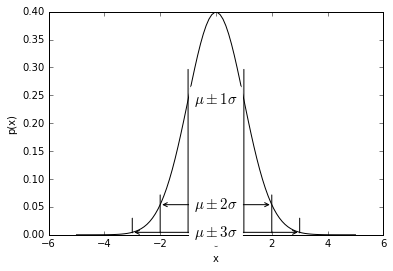

In [7]:
from scipy import stats
from scipy import interpolate

# Set the number of samples
N = 100
# Set mean and sigma of distribution
mu = 0.
sigma = 1.
x = linspace(-5,5,N)

# Generate the probabilities for x based on ~Normal(0,1)
prob = stats.norm.pdf(x, loc=mu, scale=sigma)

s = interpolate.spline(x, prob,x)

plot(x,s,color="black")
xlabel("x"); ylabel("p(x)");

bbox_props = dict(boxstyle="round", fc="w", ec="w")

for i in [1,2,3]:    
    annotate("", xy=(mu-i*sigma,stats.norm.pdf(i*sigma, loc=mu, scale=sigma)),
             xycoords="data", 
             xytext=(mu+i*sigma, stats.norm.pdf(i*sigma, loc=mu, scale=sigma)),
             textcoords="data", 
             arrowprops=dict(arrowstyle="<->",connectionstyle="arc3"))
    annotate("", xy=(mu-i*sigma,0),
             xycoords="data", 
             xytext=(mu-i*sigma, 0.3/i**2),
             textcoords="data", 
             arrowprops=dict(arrowstyle="-",connectionstyle="arc3"))
    annotate("", xy=(mu+i*sigma,0),
             xycoords="data", 
             xytext=(mu+i*sigma, 0.3/i**2),
             textcoords="data", 
             arrowprops=dict(arrowstyle="-",connectionstyle="arc3"))
    text(mu, stats.norm.pdf(i*sigma, loc=mu, scale=sigma), 
         r"$\mu\pm{}\sigma$".format(i), va="center", ha="center",size=15, bbox=bbox_props)

savefig("Normal_tol_intervals.png")

![Normal_tol_intervals.png](Normal_tol_intervals.png)

### Note on _unbiased_ sample variance

The definition of standard deviation in Eq. (1) is considered to be a _biased_ (by a factor of $(n-1)/n$) estimate of the sample variance, and in practice the following form is used to compute the sample variance:

$$Var(X) = \sigma^2 = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$$

Note that we have also replaced the population mean, $\mu$, by the estimate of the sample mean $\bar{x}$.

In [8]:
a = 0; n = 1
a = (sum((x1 - a)**n))/m  
n = 2
(sum((x1 - a)**n))/(m - 1)

11.0

In [9]:
var(x1, ddof=1)

11.0

In [10]:
N = 10000
M = N/2
M_half = M/2

# Generate array of N numbers from N(0,1)
arr_a = normal(0,1,[N,1])

# Generate array of N numbers from N(0,5)
arr_b = normal(0,3,[N,1])

# Create +vely skewed distribution by stitching together left half of the 
# distribution of a with right half of distribution of b
a_neg_vals = arr_a[arr_a < 0];
b_pos_vals = arr_b[arr_b > 0];

# Use either hstack or concatenate to join 2 vectors or matrices
d_pos_skew = hstack((a_neg_vals[1:int(M_half)],b_pos_vals[1:int(M_half)]));

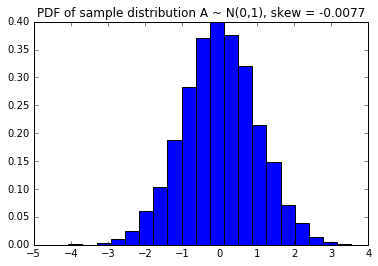

In [11]:
hist(arr_a,20,normed=True)
title("PDF of sample distribution A ~ N(0,1), skew = {[0]:.2}".format(stats.skew(arr_a)))
savefig("ZeroSkew.png")

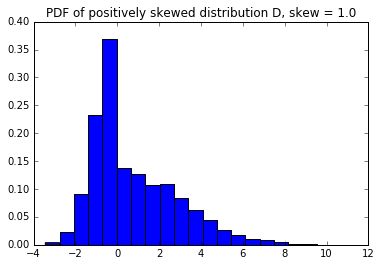

In [12]:
hist(d_pos_skew,20,normed=True);
title("PDF of positively skewed distribution D, skew = {:.2}".format(stats.skew(d_pos_skew)))
savefig("PosSkew.png")

### Normalized moments and Skewness

The $n$-th __normalized central moment__ (or __standardized central moment__) is defined as the $n$-th central moment divided by $\sigma^n$. The normalized $3$-rd central moment of a distribution is called __skewness__ and is given by:

$$ \gamma = \operatorname{E}\Big[\big(\tfrac{X-\mu}{\sigma}\big)^{\!3}\, \Big] 
             = \frac{\mu_3}{\sigma^3} 
             = \frac{\operatorname{E}\big[(X-\mu)^3\big]}{\ \ \ ( \operatorname{E}\big[ (X-\mu)^2 \big] )^{3/2}}$$

An equivalent name for $\gamma$ is the Pearson moment coefficient of skewness. The skewness of a distribution represnts the asymmetry of the distribution. If skewness if positive for a set of samples the right tail of the distribution will be longer, indicating that the mass of the distribution is concentrated to the left. Such a distribution is called a right-tailed or right-skewed distribution.  A negtive skewness indicates a long left tail.

<TABLE><TR><TD><img src="ZeroSkew.png"></TD><TD><img src="PosSkew.png"></TD></TR></TABLE>

In [13]:
# x1 has no skew:
m1 = (sum((x1 - 0)**1))/m   # First moment (i.e. mean)
m2 = (sum((x1 - m1)**2))/m  # Second moment (i.e. variance)
m3 = (sum((x1 - m1)**3))/m  # Third moment
m3/m2**1.5  # Skewness = 3rd moment / standard deviation cubed

0.0

In [14]:
x2 = array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
m1 = (sum((x2 - 0)**1))/m
m2 = (sum((x2 - m1)**2))/m 
m3 = (sum((x2 - m1)**3))/m
m3/m2**1.5

2.8460498941515415

In [15]:
stats.skew(x2)

2.8460498941515415

In [16]:
stats.skew(x2, bias=False)

3.3166247903554

In [17]:
m1 = (sum((x2 - 0)**1))/m
m2 = (sum((x2 - m1)**2))/(m-1)  # unbiased variance
m3 = (sum((x2 - m1)**3))/m
(m**2/((m-1)*(m-2)))*m3/m2**1.5  # unbiased skewness

3.3166247903554003

### Kurtosis

The last moment we will discuss in this section is the $4$-th normalized central moment, called __kurtosis__ and is given by:
$${\beta=}\frac{\operatorname{E}[(X-{\mu})^4]}{(\operatorname{E}[(X-{\mu})^2])^2} {=} \frac{\mu_4}{\sigma^4}$$

The kurtosis of the standard normal distribution is 3. In order to zero out the kurtosis of the normal distribution, a slightly altered definition of kurtosis, called the __excess kurtosis__ is used:

$$\gamma_2=\frac{\mu_4}{\sigma^4} - 3$$

The sample kurtosis is can be derived form the above definition by replacing the expectations with the sample means:

$$g_2 = \frac{\tfrac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^4}{\left(\tfrac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2\right)^2} - 3$$

The kurtosis, or equivalently excess kurtosis, is often used as a measure of the "flatness" or "peakedness" of a distribution. A distribution with negative excess kurtosis is tends to be more flat, and is called a __platykurtic__ distribution. A distribution with positive excess kurtosis tends to be sharper, or more "peaked", and is called a __leptokurtic__ distribution. 

<img src=images/symmetric_pdfs_kurt.png>

Probability density functions for 7 different distributions - Laplace, Hyperbolic Secant, logistic, normal, raised cosine, Wigmer semicircle and uniform distribution - all with $\mu$=0 and $\sigma^2$=1. 
Source: http://en.wikipedia.org/wiki/Kurtosis

In [18]:
m1 = (sum((x1 - 0)**1))/m   # First moment
m2 = (sum((x1 - m1)**2))/m  # Second moment
m4 = (sum((x1 - m1)**4))/m  # Fourth moment
m4/m2**2 - 3  # excess kurtosis = 4th Moment / 2nd Moment Squared - 3

-1.22

In [19]:
stats.kurtosis(x1)

-1.22

In [20]:
m1 = (sum((x2 - 0)**1))/m
m2 = (sum((x2 - m1)**2))/m 
m4 = (sum((x2 - m1)**4))/m
m4/m2**2 - 3

6.0999999999999996

In [21]:
stats.kurtosis(x2)

6.1

**Advantages of MOM**

* Simple to calculate
* Consistent (if we keep increasing the sample size, we eventually obtain accurate estimates)

**Disadvantages of MOM**

* Often biased (more on biasness later today)
* Sometimes gives estimates outside the parameter space

### Maximum Likelihood Estimation (MLE)

* The method of maximum likelihood we looked at yesterday is arguably the most popular technique for deriving estimators.

* Recall that if $X_1, \dots, X_n$ are i.i.d. (independently, identically distributed) sample from a population with PDF or PMF $f(x | \theta_1, \dots, \theta_k)$, the likelihood function is defined by

$$L(\theta | \textbf{x}) = L(\theta_1, \dots, \theta_k | x_1, \dots, x_n) = \prod_{i = 1}^n f(x_i | \theta_1, \dots, \theta_k) $$  

* Definition: For each sample $\textbf{x}$, let $\hat{\theta}(\textbf{x})$ be a parameter value at which $L(\theta | \textbf{x})$ attains its maximum as a function of $\theta$, with $\textbf{x}$ fixed. A **maximum likelihood estimator (MLE)** of the parameter $\theta$ based on a sample $\textbf{X}$ is $\hat{\theta}(\textbf{X})$.  

* We sometimes write $L(\theta | \textbf{x})$ as $L(\theta)$, and $\hat{\theta}(\textbf{x})$ as $\hat{\theta}$.

**Example: Bernoulli MLE**

Let $X_1, \dots, X_n$ be i.i.d. $Bernoulli(p)$. Then the likelihood function is

$$ L(p | \textbf{x}) = \prod_{i = 1}^n p^{x_i} (1 - p)^{1 - x_1} = p^y(1 - p)^{n - y} $$  

where $y = \sum x_i$.  

While this function is not hard to differentiate, it is much easier to differentiate the log-likelihood  

$$ l(p | \textbf{x}) = log(L(p | \textbf{x})) = y log(p) + (n - y) log(1 - p) $$

Differentiate $log(L(p | \textbf{x}))$ and set it to 0  

$$ \frac{y}{p} - \frac{n - y}{1 - p} = 0 $$

Solve for $p$, and we get,  

$$\hat{p} = \frac{y}{n}$$

## Evaluating Estimators

In many cases, different methods will lead to different estimators, and in today's class, we will introduce one of the criteria for evaluating estimators.

### Mean Squared Error (MSE)

* The **mean squared error (MSE)** of an estimator $\hat{\theta}$ of a parameter $\theta$ is the function of $\theta$ defined by $E(\hat{\theta} - \theta)^2$.

* So basically, the MSE of a particular estimator $\hat{\theta}$ is $E(\hat{\theta} - \theta)^2$.  

* If we do some math, we can express MSE as

$$ E(\hat{\theta} - \theta)^2 = Var(\hat{\theta}) + [E(\hat{\theta}) - \theta]^2 = Var(\hat{\theta}) + (Bias(\hat{\theta}))^2 $$ 

#### Bias

* The **bias** of a point estimator $\hat{\theta}$ is the difference between the expected value of $\hat{\theta}$ and $\theta$.  

* That is, $Bias(\hat{\theta}) = E(\hat{\theta}) - \theta$. 

* If an estimator satisfies $Bias(\hat{\theta}) = E(\hat{\theta}) - \theta = 0$ for all $\theta$, it is called an **unbiased estimator**.

#### The two components of MSE

* $Var(\hat{\theta})$, the variability of the estimator (precision)  


* $Bias(\hat{\theta})$, the bias of the estimator (accuracy)  


**To find an estimator with good MSE properties**, we need to find estimators that control both variance and bias.

#### Unbiased estimators

* Unbiased estimators do a good job of controlling bias  

* We have  

$$ MSE = E(\hat{\theta} - \theta)^2 = Var(\hat{\theta}) $$  

* If an estimator is unbiased, its MSE is equal to its variance.

**Example: Normal MSE**  

Let $X_1, \dots, X_n$ be i.i.d. $N(\mu, \sigma^2)$. The statistics $\bar{X}$ (sample mean) and $S^2$ (sample variance) are both unbiased estimators since

$$ E(\bar{X}) = \mu $$  


$$ E(S^2) = \sigma^2 $$  


for all $\mu$ and $\sigma^2$.

The **MSE**s of these estimators are given by  


$$ E(\bar{X} - \mu)^2 = Var(\bar{X}) = \frac{\sigma^2}{n} $$  


$$ E(S^2 - \sigma^2)^2 = Var(S^2) = \frac{2 \sigma^4}{n - 1} $$

#### Bias-variance trade-off

* Although many unbiased estimators are also reasonable from the standpoint of MSE, keep in mind that controlling bias alone does not guarantee that MSE is controlled.  

* In particular, it is sometimes the case that a trade-off occurs between variance and bias in such a way that a small increase in bias can be traded for a larger decrease in variance, resulting in an improved MSE.